## Load the data ##
A dataset holds 13-dimentional chemical wine analysis data. Dataset has 129 samples where 10 instances are marked as outliers, as they represent different wine cultivars.

In [1]:
## dataset source http://odds.cs.stonybrook.edu/wine-dataset/
from scipy.io import loadmat
wine = loadmat('wine.mat')

In [2]:
X, y = wine['X'], wine['y']
print(f'X ~ {X.shape}; y ~ {y.shape}')

X ~ (129, 13); y ~ (129, 1)


In [3]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

## credits go to https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b
def show_tsne(X, y):
    tsne = TSNE(n_components=2, random_state=1)
    tsne_results = tsne.fit_transform(X)
    data = {}
    data['tsne-2d-one'] = tsne_results[:,0]
    data['tsne-2d-two'] = tsne_results[:,1]
    data['class'] = y
    plt.figure(figsize=(8,5))
    sns.scatterplot(
        x="tsne-2d-one", y="tsne-2d-two",
        style="class", hue="class",
        data=data,
        legend="full",
        alpha=0.7
    )

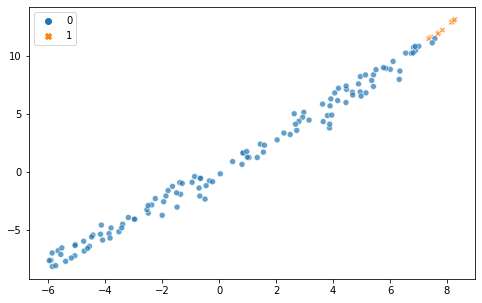

In [4]:
show_tsne(X, y.flatten())

## Outlier detection ## 
Follow [this guide](https://scikit-learn.org/stable/modules/outlier_detection.html) and try to estimate outliers for this case with different tools.

F1score=0.6956521739130435


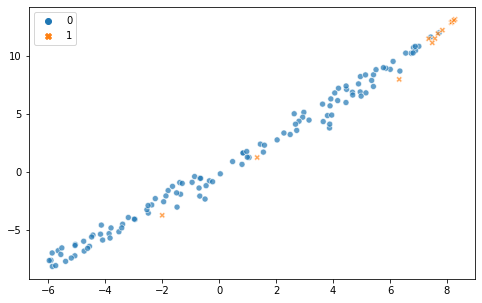

In [5]:
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import f1_score

# https://scikit-learn.org/stable/modules/generated/sklearn.covariance.EllipticEnvelope.html#sklearn.covariance.EllipticEnvelope
cov = EllipticEnvelope(random_state=0).fit(X)

# -1 means outlier, 1 means inlier
y_predict = [0 if c == 1 else 1 for c in cov.predict(X)]
print(f'F1score={f1_score(y, y_predict)}')
show_tsne(X, y_predict)

# TODO #
Fit, measure F1 score and plot with t-SNE for:
- [LocalOutlierFactor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html#sklearn.neighbors.LocalOutlierFactor)
- [IsolationForest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html#sklearn.ensemble.IsolationForest)
- [OneClassSVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html#sklearn.svm.OneClassSVM) with `'rbf'` kernel.

Which one solves out problems in the best way?

F1score=0.6451612903225806


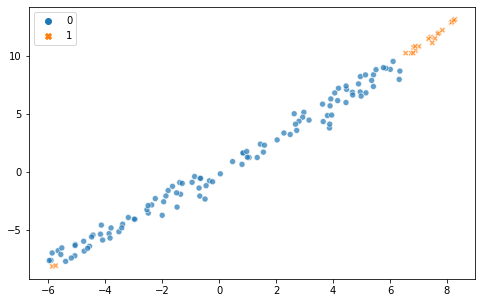

In [14]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=25).fit_predict(X)
y_predict = [0 if c == 1 else 1 for c in lof]
print(f'F1score={f1_score(y, y_predict)}')
show_tsne(X, y_predict)

F1score=0.24


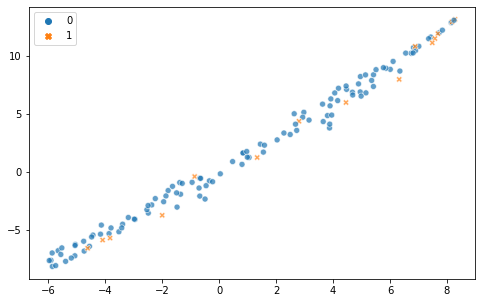

In [9]:
from sklearn.ensemble import IsolationForest

forest = IsolationForest().fit(X)
y_predict = [0 if c == 1 else 1 for c in forest.predict(X)]
print(f'F1score={f1_score(y, y_predict)}')
show_tsne(X, y_predict)

F1score=0.2702702702702703


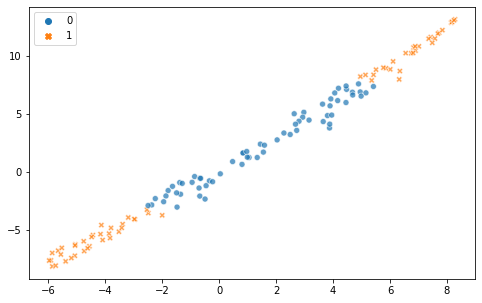

In [11]:
from sklearn.svm import OneClassSVM
svm = OneClassSVM().fit(X)
y_predict = [0 if c == 1 else 1 for c in svm.predict(X)]
print(f'F1score={f1_score(y, y_predict)}')
show_tsne(X, y_predict)